In [424]:
import followthemoney as ftm
import followthemoney.model as model
import pandas
import json
import math
from urllib import parse as url_parse
from pprint import pprint
import matplotlib.pyplot as plt

# Importing and preprocessing

In [60]:
# local import for easier reproducibility 
json_path = "./data/meineabgeordneten.json"

entity_dicts = []
with open(json_path) as f:
    for line in f:
        entity_dicts.append(json.loads(line))

In [61]:
entity_dicts[:4]


[{'id': '0001e06f905dab372b8a2ff598bacc5ad9bf8096',
  'origin': 'memorious',
  'properties': {'description': ['Vorstandsvorsitzender [185652v]'],
   'endDate': ['2004-08-13'],
   'member': ['66cdd2089745a9a9e88cbc8821efc3418cb506d0'],
   'organization': ['a07e61b414ddc09ebbc247723fb172e33b7a4576'],
   'startDate': ['1999-08-21']},
  'schema': 'Membership'},
 {'id': '0003fcc7ed8b06ca8f54958742f4b3b38c528c4b',
  'origin': ['memorious'],
  'properties': {'member': ['23cf6bd17dfa7293cf09a026d73bbac842ce5d20'],
   'organization': ['1535924c3adf9789c95da78ede4405b4ec47a746'],
   'sourceUrl': ['https://www.meineabgeordneten.at/Abgeordnete/margit.goell']},
  'schema': 'Membership'},
 {'id': '000615908f2af1fffb57978b0fe93d919f0f6d35',
  'origin': 'memorious',
  'properties': {'description': ['Geschäftsführer [166665x]'],
   'endDate': ['2016-03-25'],
   'member': ['7702e86de001056fd8bb0da08003bd5377418f99'],
   'organization': ['402935266a8ef14cea17094d133216b19bd89435'],
   'startDate': ['2015

In [103]:
person_dicts = [entity for entity in ftm_entities if entity["schema"] == "Person"]
ftm_proxies =[model.get_proxy(entity) for entity in ftm_entities]
ftm_persons = [proxy for proxy in ftm_proxies if proxy.schema.name == "Person"]


In [70]:
ftm_persons[0].first("birthDate")

'1961-09-30'

All properties of entities are multivalued, although they mostly hold only one single value. I transform the data in order to call the API with single-valued properties.

In [117]:
flat_entities = []
for entity in ftm_persons:
    prop_dict ={}
    for prop, val in entity.properties.items():
        prop_dict["id"] = entity.id
        prop_dict[prop] = val[0] if len(val)== 1 else  val
    flat_entities.append(prop_dict)


In [119]:
clean_person_df = pandas.DataFrame.from_dict(flat_entities)
clean_person_df

,id,birthDate,birthPlace,country,email,firstName,lastName,name,sourceUrl,summary,title,website
0,000d69b3ddd18ace9906a387bee788a74c120182,1961-09-30,St. Jakob in Defereggen (Osttirol),at,gerald.hauser@parlament.gv.at,Gerald,Hauser,Gerald Hauser,https://www.meineabgeordneten.at/Abgeordnete/G...,"[Abgeordneter zum Nationalrat, FPÖ, Kunstzeit ...",Prof. Mag.,"[https://www.facebook.com/hausergerald/, http:..."
1,006590deda890cb7a0282649edaf6a907acfca73,1968-04-20,Innsbruck,at,andrea.haselwanter-schneider@liste-fritz.at,Andrea,Haselwanter-Schneider,Andrea Haselwanter-Schneider,https://www.meineabgeordneten.at/Abgeordnete/A...,"[Abgeordnete zum Landtag von Tirol, Liste Frit...",Dr.in,[https://www.facebook.com/profile.php?id=10001...
2,00a6fc68c0b7836ca54492daac800d1761f53710,1964-12-30,Mühldorf,at,erwin.angerer@fpoe.at,Erwin,Angerer,Erwin Angerer,https://www.meineabgeordneten.at/Abgeordnete/e...,[Förderverein der Römisch-Keltischen Ansiedelu...,NaN,"[https://www.instagram.com/angerer_erwin/, htt..."
3,00d94ab6f32bebad8c49149eb4d23d19f69aab6c,1963-01-09,Steyr (Oberösterreich),at,gerhard.deimek@fpoe.at,Gerhard,Deimek,Gerhard Deimek,https://www.meineabgeordneten.at/Abgeordnete/G...,"[Mitglied des Gemeinderates, Liberaler Klub Ob...",Dipl. Ing.,"[https://www.facebook.com/Gerhard.Deimek, http..."
4,01bc656e69277677a71fc768bd54e80f018c33f3,1958-02-14,Wien,at,veronika.matiasek@fpoe.at,Veronika,Matiasek,Veronika Matiasek,https://www.meineabgeordneten.at/Abgeordnete/v...,"[MTV Hernals (Männer Turnverein Hernals), Caje...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
776,fcbd8e99fb0abf3fac31c6e6d4f4416dc18b83d5,1968-11-25,Graz,at,elisabeth.grossmann@parlament.gv.at,Elisabeth,Grossmann,Elisabeth Grossmann,https://www.meineabgeordneten.at/Abgeordnete/E...,"[ZAM-Steiermark GmbH, Verein der Freundinnen d...",Mag.a,[https://www.facebook.com/elisabeth.grossmann....
777,fe696e9d957ceee37262a82bd7bf3eef335ac012,1973-11-28,Dornbirn,at,gerald.loacker@parlament.gv.at,Gerald,Loacker,Gerald Loacker,https://www.meineabgeordneten.at/Abgeordnete/g...,"[Abgeordneter zum Nationalrat, Ersatzmitglied ...",Mag.,"[https://www.linkedin.com/in/gloacker/, http:/..."
778,fe80246e63e42acc1a3a64b8dad83e323fb10d2f,1967-06-18,Bruck an der Mur (Steiermark),at,joerg.leichtfried@spoe.at,Jörg,Leichtfried,Jörg Leichtfried,https://www.meineabgeordneten.at/Abgeordnete/J...,[Europäische Föderalistische Bewegung Österrei...,Mag.,"[https://twitter.com/jleichtfried, https://www..."
779,feffebf73e441b53967774e8c746e8a465e218d9,1981-10-21,Mödling,at,alexander.melchior@parlament.gv.at,Axel,Melchior,Axel Melchior,https://www.meineabgeordneten.at/Abgeordnete/a...,"[""Club35 Niederösterreich"" - Verein für Politi...",NaN,"[https://www.linkedin.com/in/axel-melchior/, h..."


# Reconciliation

In [107]:
import requests
import urllib
reconciliation_endpoint = urllib.parse.urlparse("https://wikidata.reconci.link/en/api")

In [108]:
reconciliation_endpoint

ParseResult(scheme='https', netloc='wikidata.reconci.link', path='/en/api', params='', query='', fragment='')

In [145]:
mapping = {
    "birthDate" : "P569",
    "birthPlace" : "P19",
    "email" : "P968",
    "firstName" : "P735",
    "lastName" : "P734",
    "title" : "P512",
    "website" : "P856"
}
query = "name"

In [193]:
def createQuery(entity, type, limit = 5):
    if entity.schema.name != "Person":
        return null
    query_params = {}
    query_params["query"] = entity.first("name")
    query_params["type"] = type
    query_params["properties"] = []
    query_params["limit"] = limit # candidate limit
    for prop, value in entity.properties.items():
        #print(prop, mapping.get(prop))
        wikidataId = mapping.get(prop)
        if wikidataId:
            prop = {"pid": wikidataId, "v": value[0] if len(value)== 1 else  value}
            query_params["properties"].append(prop)   
 
    return query_params
    


In [194]:
createQuery(ftm_persons[0], "Q5")

{'query': 'Gerald Hauser',
 'type': 'Q5',
 'properties': [{'pid': 'P569', 'v': '1961-09-30'},
  {'pid': 'P19', 'v': 'St. Jakob in Defereggen (Osttirol)'},
  {'pid': 'P968', 'v': 'gerald.hauser@parlament.gv.at'},
  {'pid': 'P735', 'v': 'Gerald'},
  {'pid': 'P734', 'v': 'Hauser'},
  {'pid': 'P512', 'v': 'Prof. Mag.'},
  {'pid': 'P856',
   'v': ['https://www.facebook.com/hausergerald/',
    'http://www.facebook.com/gerald.hauser.1829',
    'https://www.instagram.com/fpoe_gerald.hauser/']}],
 'limit': 5}

In [387]:
def create_batch_queries(entities, type, batch_size = 10):
    start = 0
    end = 0 + batch_size
    batches =[]
    for batch_nr in range(math.ceil(len(entities)/batch_size)):
        queries = {"q"+str(i):createQuery(entity, "Q5") for i, entity in enumerate(ftm_persons[start:end])}
        batches.append(queries)
        start += batch_size
        end += batch_size
    return batches
    

In [388]:
def query_endpoint(query_batches):
    results = []
    for batch_query in query_batches:
        # Endpoint only accepts double quotes, not single quotes.
        urlencoded = url_parse.quote_plus(json.dumps(batch_query))
        response = requests.get(reconciliation_endpoint.geturl()+ "?queries=" + urlencoded)
        results.extend([resp for index, resp in response.json().items()])
    return results

In [396]:
batch_query = create_batch_queries(ftm_persons, "Q5") # Q5 is the Wikidata ID for type "Human".
results = query_endpoint(batch_query[:1])



In [416]:
results[3:7]

[{'result': [{'features': [{'id': 'P569', 'value': 100},
     {'id': 'P19', 'value': 42},
     {'id': 'P968', 'value': 0},
     {'id': 'P735', 'value': 100},
     {'id': 'P734', 'value': 100},
     {'id': 'P512', 'value': 0},
     {'id': 'P856', 'value': 0},
     {'id': 'all_labels', 'value': 100}],
    'id': 'Q1511470',
    'match': True,
    'name': 'Gerhard Deimek',
    'score': 62.31578947368421,
    'type': [{'id': 'Q5', 'name': 'human'}]}]},
 {'result': [{'features': [{'id': 'P569', 'value': 100},
     {'id': 'P19', 'value': 100},
     {'id': 'P968', 'value': 0},
     {'id': 'P735', 'value': 100},
     {'id': 'P734', 'value': 100},
     {'id': 'all_labels', 'value': 100}],
    'id': 'Q2517478',
    'match': True,
    'name': 'Veronika Matiasek',
    'score': 86.66666666666667,
    'type': [{'id': 'Q5', 'name': 'human'}]}]},
 {'result': [{'features': [{'id': 'P569', 'value': 100},
     {'id': 'P19', 'value': 100},
     {'id': 'P968', 'value': 0},
     {'id': 'P735', 'value': 100},

# Analysis

In [409]:
intermed_table = []
header = ["id", "name", "cd_wd_id", "cd_name","cd_match", "cd_score"]
for result, entity in zip(results, ftm_persons):
    candidates = result["result"]
    for candidate in candidates:
        intermed_table.append([entity.id,entity.first("name"), candidate["id"], candidate["name"], candidate["match"], candidate["score"]])
candidate_table = pandas.DataFrame(intermed_table, columns= header)    

In [410]:
candidate_table

,id,name,cd_wd_id,cd_name,cd_match,cd_score
0,000d69b3ddd18ace9906a387bee788a74c120182,Gerald Hauser,Q1509909,Gerald Hauser,True,66.631579
1,006590deda890cb7a0282649edaf6a907acfca73,Andrea Haselwanter-Schneider,Q494041,Andrea Haselwanter-Schneider,False,57.894737
2,00a6fc68c0b7836ca54492daac800d1761f53710,Erwin Angerer,Q17352678,Erwin Angerer,True,76.470588
3,00d94ab6f32bebad8c49149eb4d23d19f69aab6c,Gerhard Deimek,Q1511470,Gerhard Deimek,True,62.315789
4,01bc656e69277677a71fc768bd54e80f018c33f3,Veronika Matiasek,Q2517478,Veronika Matiasek,True,86.666667
5,01c76b64fbddacee066f3814d37ae8447da65e9e,Magnus Brunner,Q1884520,Magnus Brunner,True,75.473684
6,01c76b64fbddacee066f3814d37ae8447da65e9e,Magnus Brunner,Q75450706,Magnus Gregory Nathaniel Brunner,False,26.578947
7,0253c39836190ac45109e28e010a7c0b027d15e2,Lara Köck,Q29533483,Lara Köck,False,50.526316
8,0278632370d8ff43513a307b3426e4e7f00223c0,Christoph Steiner,Q51885957,Christoph Steiner,True,76.470588
9,0278632370d8ff43513a307b3426e4e7f00223c0,Christoph Steiner,Q64985276,Christoph Steiner,False,55.058824


In [460]:
cd_num_counts = candidate_table.groupby("id")["id"].count()
cd_occ_counts =  cd_num_counts.reset_index(name="cd_num").groupby("cd_num").count().reset_index()
cd_occ_counts.columns = ["cd_num", "count"]

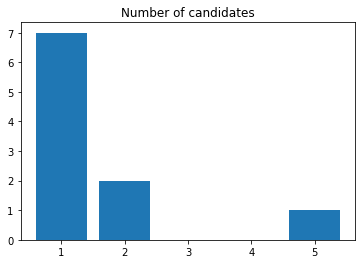

In [467]:
plt.bar(cd_occ_counts["cd_num"], cd_occ_counts["count"])
plt.title("Number of candidates")
plt.style.use("ggplot")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f675e497a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f675e497160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f675e0cf610>,
 'medians': [<matplotlib.lines.Line2D at 0x7f675e6c60d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f675e6c69d0>,
 'means': []}

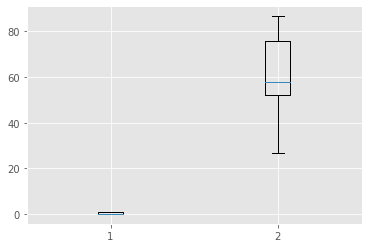

In [477]:
cd_match_score = candidate_table[["cd_match", "cd_score"]]
plt.boxplot(cd_match_score)

In [355]:
response.json()

{'q0': {'result': [{'features': [{'id': 'P569', 'value': 100},
     {'id': 'P19', 'value': 83},
     {'id': 'P968', 'value': 0},
     {'id': 'P735', 'value': 100},
     {'id': 'P734', 'value': 100},
     {'id': 'P512', 'value': 0},
     {'id': 'P856', 'value': 0},
     {'id': 'all_labels', 'value': 100}],
    'id': 'Q1509909',
    'match': True,
    'name': 'Gerald Hauser',
    'score': 66.63157894736841,
    'type': [{'id': 'Q5', 'name': 'human'}]}]},
 'q1': {'result': [{'features': [{'id': 'P569', 'value': 100},
     {'id': 'P19', 'value': 100},
     {'id': 'P968', 'value': 0},
     {'id': 'P735', 'value': 100},
     {'id': 'P734', 'value': 0},
     {'id': 'P512', 'value': 0},
     {'id': 'P856', 'value': 0},
     {'id': 'all_labels', 'value': 100}],
    'id': 'Q494041',
    'match': False,
    'name': 'Andrea Haselwanter-Schneider',
    'score': 57.89473684210526,
    'type': [{'id': 'Q5', 'name': 'human'}]}]},
 'q2': {'result': [{'features': [{'id': 'P569', 'value': 100},
     {'id

In [350]:

print(json.dumps(response.json(), indent = 4))

{
    "q0": {
        "result": [
            {
                "features": [
                    {
                        "id": "P569",
                        "value": 100
                    },
                    {
                        "id": "P19",
                        "value": 83
                    },
                    {
                        "id": "P968",
                        "value": 0
                    },
                    {
                        "id": "P735",
                        "value": 100
                    },
                    {
                        "id": "P734",
                        "value": 100
                    },
                    {
                        "id": "P512",
                        "value": 0
                    },
                    {
                        "id": "P856",
                        "value": 0
                    },
                    {
                        "id": "all_labels",
                        

'https://wikidata.reconci.link/en/api?queries=%7B%22q0%22%3A+%7B%22query%22%3A+%22Gerald+Hauser%22%2C+%22type%22%3A+%22Q5%22%2C+%22properties%22%3A+%5B%7B%22pid%22%3A+%22P569%22%2C+%22v%22%3A+%221961-09-30%22%7D%2C+%7B%22pid%22%3A+%22P19%22%2C+%22v%22%3A+%22St.+Jakob+in+Defereggen+%28Osttirol%29%22%7D%2C+%7B%22pid%22%3A+%22P968%22%2C+%22v%22%3A+%22gerald.hauser%40parlament.gv.at%22%7D%2C+%7B%22pid%22%3A+%22P735%22%2C+%22v%22%3A+%22Gerald%22%7D%2C+%7B%22pid%22%3A+%22P734%22%2C+%22v%22%3A+%22Hauser%22%7D%2C+%7B%22pid%22%3A+%22P512%22%2C+%22v%22%3A+%22Prof.+Mag.%22%7D%2C+%7B%22pid%22%3A+%22P856%22%2C+%22v%22%3A+%5B%22https%3A%2F%2Fwww.facebook.com%2Fhausergerald%2F%22%2C+%22http%3A%2F%2Fwww.facebook.com%2Fgerald.hauser.1829%22%2C+%22https%3A%2F%2Fwww.instagram.com%2Ffpoe_gerald.hauser%2F%22%5D%7D%5D%2C+%22limit%22%3A+5%7D%2C+%22q1%22%3A+%7B%22query%22%3A+%22Andrea+Haselwanter-Schneider%22%2C+%22type%22%3A+%22Q5%22%2C+%22properties%22%3A+%5B%7B%22pid%22%3A+%22P569%22%2C+%22v%22%3A+%221968-

In [349]:
response.content

b'{"q0":{"result":[{"features":[{"id":"P569","value":100},{"id":"P19","value":83},{"id":"P968","value":0},{"id":"P735","value":100},{"id":"P734","value":100},{"id":"P512","value":0},{"id":"P856","value":0},{"id":"all_labels","value":100}],"id":"Q1509909","match":true,"name":"Gerald Hauser","score":66.63157894736841,"type":[{"id":"Q5","name":"human"}]}]},"q1":{"result":[{"features":[{"id":"P569","value":100},{"id":"P19","value":100},{"id":"P968","value":0},{"id":"P735","value":100},{"id":"P734","value":0},{"id":"P512","value":0},{"id":"P856","value":0},{"id":"all_labels","value":100}],"id":"Q494041","match":false,"name":"Andrea Haselwanter-Schneider","score":57.89473684210526,"type":[{"id":"Q5","name":"human"}]}]},"q2":{"result":[{"features":[{"id":"P569","value":100},{"id":"P19","value":100},{"id":"P968","value":0},{"id":"P735","value":100},{"id":"P734","value":100},{"id":"P856","value":0},{"id":"all_labels","value":100}],"id":"Q17352678","match":true,"name":"Erwin Angerer","score":76.

In [303]:
response = requests.get(reconciliation_endpoint.geturl(), params=createQuery(ftm_persons[0], "Q5"))

In [343]:
json.dumps(batch_query[0])

'{"queries": {"q0": {"query": "Gerald Hauser", "type": "Q5", "properties": [{"pid": "P569", "v": "1961-09-30"}, {"pid": "P19", "v": "St. Jakob in Defereggen (Osttirol)"}, {"pid": "P968", "v": "gerald.hauser@parlament.gv.at"}, {"pid": "P735", "v": "Gerald"}, {"pid": "P734", "v": "Hauser"}, {"pid": "P512", "v": "Prof. Mag."}, {"pid": "P856", "v": ["https://www.facebook.com/hausergerald/", "http://www.facebook.com/gerald.hauser.1829", "https://www.instagram.com/fpoe_gerald.hauser/"]}], "limit": 5}, "q1": {"query": "Andrea Haselwanter-Schneider", "type": "Q5", "properties": [{"pid": "P569", "v": "1968-04-20"}, {"pid": "P19", "v": "Innsbruck"}, {"pid": "P968", "v": "andrea.haselwanter-schneider@liste-fritz.at"}, {"pid": "P735", "v": "Andrea"}, {"pid": "P734", "v": "Haselwanter-Schneider"}, {"pid": "P512", "v": "Dr.in"}, {"pid": "P856", "v": ["https://www.facebook.com/profile.php?id=100012495185526", "https://www.facebook.com/haselwanter.schneider/", "https://www.linkedin.com/in/andrea-hasel

In [258]:
batch_query[0]

{'q0': {'query': 'Gerald Hauser',
  'type': 'Q5',
  'properties': [{'pid': 'P569', 'v': '1961-09-30'},
   {'pid': 'P19', 'v': 'St. Jakob in Defereggen (Osttirol)'},
   {'pid': 'P968', 'v': 'gerald.hauser@parlament.gv.at'},
   {'pid': 'P735', 'v': 'Gerald'},
   {'pid': 'P734', 'v': 'Hauser'},
   {'pid': 'P512', 'v': 'Prof. Mag.'},
   {'pid': 'P856',
    'v': ['https://www.facebook.com/hausergerald/',
     'http://www.facebook.com/gerald.hauser.1829',
     'https://www.instagram.com/fpoe_gerald.hauser/']}],
  'limit': 5},
 'q1': {'query': 'Andrea Haselwanter-Schneider',
  'type': 'Q5',
  'properties': [{'pid': 'P569', 'v': '1968-04-20'},
   {'pid': 'P19', 'v': 'Innsbruck'},
   {'pid': 'P968', 'v': 'andrea.haselwanter-schneider@liste-fritz.at'},
   {'pid': 'P735', 'v': 'Andrea'},
   {'pid': 'P734', 'v': 'Haselwanter-Schneider'},
   {'pid': 'P512', 'v': 'Dr.in'},
   {'pid': 'P856',
    'v': ['https://www.facebook.com/profile.php?id=100012495185526',
     'https://www.facebook.com/haselwant